In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [52]:
def phi_n(n, theta):
    """Eigenvectors; page 687 Equation (33)"""
    return 1/np.sqrt(1*np.pi)*np.exp(1j*n* theta)


def C(n, j):
    """Used to calculate eigenvalues; page 687 Lemma 4.1"""
    global r, gamma
    rho = (gamma[1:]+gamma[:-1]) / (gamma[1:]-gamma[:-1])
    if j == 1:
        return rho[1]*r[1]**(-2*abs(n))
    else:
        return (rho[j]*C(n, j-1) + r[j]**(-2*abs(n))) / (rho[j] + C(n, j-1)*r[j]**(2*abs(n)))


In [49]:
# Page 693

def Psi(d, t):
    """Used to calculage gamma; page 693 un-numbered equation"""
    P = np.zeros_like(t)
    for i,tt in enumerate(t):
        if np.abs(tt) <= d:
            P[i] = np.exp(-2*(d**2+tt**2)/(tt+d)**2/(tt-d)**2)
    return P

def gamma(alpha, d, r):
    """Conductivity; page 693 equation (60)"""
    return (alpha*Psi(d, r)+1)**2

def q(r, gamma):
    """Schrodinger potential; page 693 equation (61)"""
    h = r[1] - r[0]
    D1 = scipy.linalg.toeplitz([-1, 0, *np.zeros(len(r)-2)], [-1, 1, *np.zeros(len(r)-2)]) / h
    D2 = scipy.linalg.toeplitz([-2, 1, *np.zeros(len(r)-2)]) / h**2
    return (D2 @ np.sqrt(gamma) + D1 @ np.sqrt(gamma) / r) / np.sqrt(gamma)

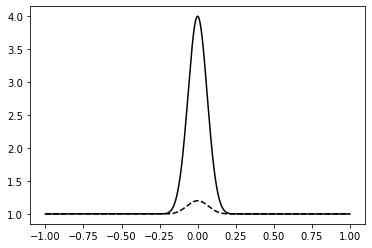

In [50]:
Npts = 8001
r = np.linspace(-1,1,Npts)
gamma1 = gamma(alpha=(np.sqrt(6/5)-1)*np.exp(8), d=0.5, r=r)
gamma2 = gamma(np.exp(8), d=0.5, r=r)
plt.plot(r, gamma1, 'k--')
plt.plot(r, gamma2, 'k')

(-200, 100)

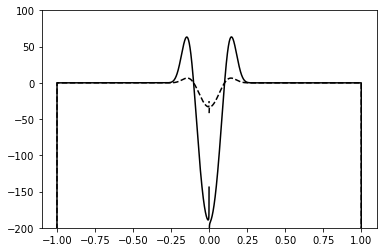

In [51]:
plt.plot(r, q(r, gamma1), 'k--')
plt.plot(r, q(r, gamma2), 'k')
plt.ylim(-200,100)